# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

- **Expected Accuracy Score on the given test set**: >89%
- **Expected Accuracy Score on the HIDDEN test set**: as high as possible. Top 5 will be picked to present

**Submission:** 
- Share your notebook to instructors (quan.tran@coderschool.vn), and prepare your presentation on the next Monday afternoon. 

- The submission.csv file. You can put them inside this submissions folder: https://drive.google.com/drive/folders/1-e8OD6gBR-lKfHSV_tm56Olm7uTTVHMU?usp=sharing
The name of the file should be like this: <your_name>_submission.csv. For example: quantran_submission.csv


**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Use Sklearn Pipeline (use California House Pricing notebook as an example)
- Confusion Matrix
- Plot the images that the model predicts incorrectly
- Use confusion matrix and images plotted incorrectly to do error analysis

## Sample code to get fashion MNIST data

In [ ]:
#IMPORT LIBRARY :
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Sample code to display images

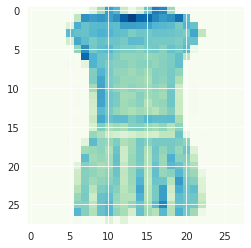

In [ ]:
plt.imshow(X_train[3], cmap='GnBu')

In [ ]:
def plot_images(images, labels=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    if not labels is None:
      ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='GnBu')


In [ ]:
def get_samples(n_samples, X, y=None):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
  if not y is None:
    return X[samples_index], y[samples_index]
  return X[samples_index]

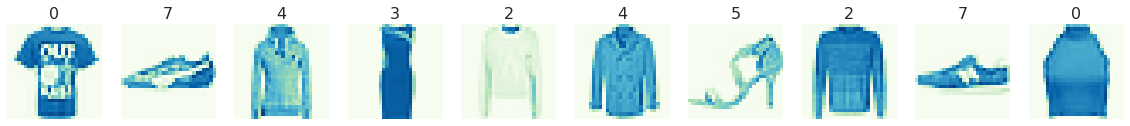

In [ ]:
images, labels = get_samples(10, X_train, y_train)
plot_images(images, labels)

Label   Description

0         T-shirt/top

1         Trouser

2         Pullover

3         Dress

4         Coat

5         Sandal

6         Shirt

7         Sneaker

8         Bag

9         Ankle boot


Our dataset consists of 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Let us have a look at one instance (an article image) of this training dataset X_train.

To view a single instance(an article image),all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

### LET DO IT 
![](https://i.imgur.com/beUNuyO.png)

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

# Data Overview
## Dataset Introduction

**Fashion-MNIST** is a dataset of Zalando’s article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

The Fashion-MNIST is to serve as a replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

##Data Exploration
Here’s an example how the data looks:

## Data Sample
There are 10 classes in this dataset, below are the labels and description:

0 — T-shirt/top; 1 — Trouser; 2 — Pullover; 3 — Dress; 4 — Coat;

5 — Sandal; 6 — Shirt; 7 — Sneaker; 8 — Bag; 9 — Ankle boot

Fashion Images with Labels

# Modeling
We need to classify them into one of these classes, hence, it is essentially a ‘Multi-class Classification’ problem.

We will be using various Classifiers and comparing their results/scores.

### Sample & split train/test set

In [ ]:
#Set *number* of samples for testing and trainning
n_samples = 60000
n_test_samples = 10000

#get sample for train first : 
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

In [ ]:
#take all for training final model
#Run when u got best model

X_train_flat =  X_train
y_train_flat =  y_train
X_test_flat=  X_test
y_test_flat = y_test

In [ ]:
# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255
# Shape()
print('Training data', X_train_flat.shape,type(X_train_flat))
print('Test data', X_test_flat.shape,type(X_test_flat))

Training data (60000, 784) <class 'numpy.ndarray'>
Test data (10000, 784) <class 'numpy.ndarray'>


### Import library, tools :
List model
1. logisticReg
2. SVC
3. Random Forest
4. Xgboost
5. LightGBM

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

#### PCA with train & validation dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_flat)


# Apply transform to both the training set and the test set.
X_train_flat1 = scaler.transform(X_train_flat)
X_test_flat1 = scaler.transform(X_test_flat)


# X_train_flat1 = StandardScaler().fit_transform(X_train_flat)
# X_test_flat1= StandardScaler().fit_transform(X_test_flat)

In [ ]:
print(X_train_flat1)

NameError: ignored

In [ ]:
#Run this if model using PCA
# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 527 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train_flat1)
#apply the fit_transfrom to validation set
X_validation_reduced =  pca.transform(X_test_flat1)
pca.n_components_


527

In [ ]:
# X_train_reduced.shape
X_validation_reduced.shape

(10000, 527)

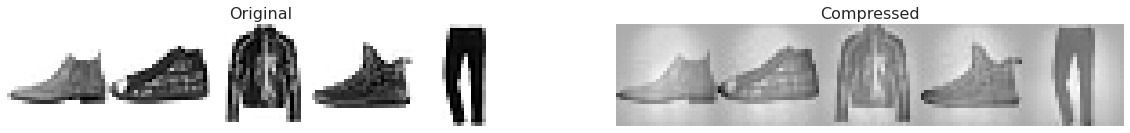

In [ ]:
# use inverse_transform to decompress back to 784 dimensions

X_train_recovered = pca.inverse_transform(X_train_reduced)
X_validation_recovered = pca.inverse_transform(X_validation_reduced)


import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(20, 10))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_test_flat[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_validation_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

### 1. Logistic Regression  + PCA Model: 

In [ ]:

model = 'LogisticRegression'
start = time.time()
logReg = LogisticRegression(max_iter=200,n_jobs=-1, random_state=121,multi_class="ovr", C =10 )
logReg.fit(X_train_reduced,y_train_flat)
stop = time.time()
time_trainning = {stop - start}
print(f"Training time: {stop - start}s")

Training time: 1530.091138124466s


In [ ]:
y_test_predict  = logReg.predict(X_validation_reduced)
y_train_predict = logReg.predict(X_train_reduced)
#check the trainset
print(f'Accuracy by {model} on {n_samples} samples train dataset is {(accuracy_score(y_train_flat, y_train_predict))*100} %')
print(f'f1-score by {model} on {n_samples} samples train dataset is {f1_score(y_train_flat, y_train_predict,average="weighted")*100} %')
print(f'Recall by {model} on {n_samples} samples train dataset is {(recall_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
print(f'Precision by {model} on {n_samples} samples train dataset is {(precision_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
#check the testset
print('....')
print(f'Accuracy by {model} on {n_test_samples} samples test dataset is {(accuracy_score(y_test_flat, y_test_predict))*100} %')
print(f'f1-score by {model} on {n_test_samples} samples test dataset is {(f1_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Recall by {model} on {n_test_samples} samples test dataset is {(recall_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Precision by {model} on {n_test_samples} samples train dataset is {(precision_score(y_test_flat, y_test_predict,average="weighted")*100)} %')


# lr_accuracy = accuracy_score(y_train_flat, y_train_predict)
# lr_precision = precision_score(y_train_flat, y_train_predict, average='weighted')
# lr_recall = recall_score(y_train_flat, y_train_predict, average='weighted')
# lr_f1_score = f1_score(y_train_flat, y_train_predict, average='weighted')

# print(" Logistic Regression Accuracy: ", lr_accuracy)
# print(" Logistic Regression Precision: ", lr_precision)
# print(" Logistic Regression Recall: ", lr_precision)
# print(" Logistic RegressionF1 Score: ", lr_f1_score


Accuracy by LogisticRegression on 60000 samples train dataset is 87.60333333333334 %
f1-score by LogisticRegression on 60000 samples train dataset is 87.52756814589978 %
Recall by LogisticRegression on 60000 samples train dataset is 87.60333333333334 %
Precision by LogisticRegression on 60000 samples train dataset is 87.49195071969137 %
....
Accuracy by LogisticRegression on 10000 samples test dataset is 84.35000000000001 %
f1-score by LogisticRegression on 10000 samples test dataset is 84.25951918037767 %
Recall by LogisticRegression on 10000 samples test dataset is 84.35000000000001 %
Precision by LogisticRegression on 10000 samples train dataset is 84.21854097576008 %


We also see this is a overfitting case.

The accuracy from train/test dataset had far difference to each others.

Let's plot the result to see where proplem come from.

''

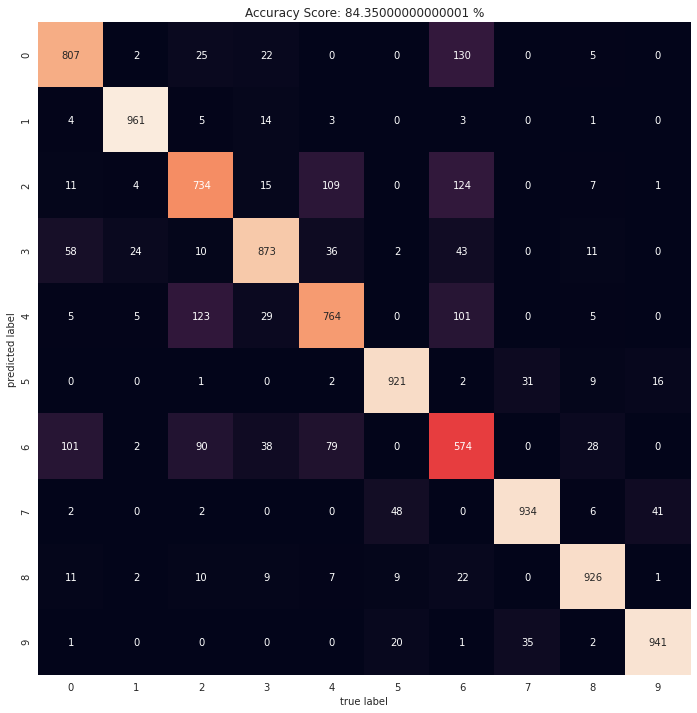

In [ ]:
# Let plot them to see what happen :
plt.figure(figsize=(12,12))
mat = confusion_matrix(y_test_flat, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(f'Accuracy Score: {accuracy_score(y_test_flat, y_test_predict)*100} %')
;

# so we all see the most wrong things come from label 2 and 6

### 2. SVC

In [ ]:
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
import pickle
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import time

In [ ]:
svm = SVC(C = 10,kernel='poly')

svm.fit(X_train_reduced,y_train_flat)
svm_predict = svm.predict(X_validation_reduced)

start = time.time()
print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))
stop = time.time()

print(f"Training time: {stop - start}s")

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.71      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

The average_accuracy is 89.4%
Training time: 0.0252838134765625s


In [ ]:
print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.71      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

The average_accuracy is 89.4%


In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
train_binary = binarizer.fit_transform(X_train) 
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

(60000, 784)

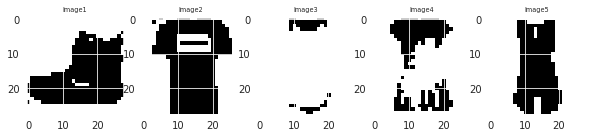

In [ ]:

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

### 3. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
model = 'Random Forest'

start = time.time()
# # train normal
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=8, n_jobs= -1, random_state=10)
rnd_clf.fit(X_train_flat, y_train_flat)
#train with pca 
# rnd_clf = RandomForestClassifier(n_estimators=200,criterion ="entropy",max_depth=5, n_jobs= -1, random_state=12)
# rnd_clf.fit(X_train_reduced,y_train_flat)

#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()

print(f"Training time: {stop - start}s")
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rnd_clf, open('rdnfr', 'wb'))

#trainning time depend so strong on n_estimators

Training time: 33.57903218269348s


In [ ]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = rnd_clf.predict(X_train_flat)
y_test_predict = rnd_clf.predict(X_test_flat)
#with pca
# y_train_predict = rnd_clf.predict(X_train_reduced)
# y_test_predict = rnd_clf.predict(X_validation_reduced)

In [ ]:
#check the trainset
print(f'Accuracy by {model} on {n_samples} samples train dataset is {(accuracy_score(y_train_flat, y_train_predict))*100} %')
print(f'f1-score by {model} on {n_samples} samples train dataset is {f1_score(y_train_flat, y_train_predict,average="weighted")*100} %')
print(f'Recall by {model} on {n_samples} samples train dataset is {(recall_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
print(f'Precision by {model} on {n_samples} samples train dataset is {(precision_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
#check the testset
print('....')
print(f'Accuracy by {model} on {n_test_samples} samples test dataset is {(accuracy_score(y_test_flat, y_test_predict))*100} %')
print(f'f1-score by {model} on {n_test_samples} samples test dataset is {(f1_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Recall by {model} on {n_test_samples} samples test dataset is {(recall_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Precision by {model} on {n_test_samples} samples train dataset is {(precision_score(y_test_flat, y_test_predict,average="weighted")*100)} %')

Accuracy by Random Forest on 60000 samples train dataset is 84.29666666666667 %
f1-score by Random Forest on 60000 samples train dataset is 83.93328849640523 %
Recall by Random Forest on 60000 samples train dataset is 84.29666666666667 %
Precision by Random Forest on 60000 samples train dataset is 84.55834322691364 %
....
Accuracy by Random Forest on 10000 samples test dataset is 82.24000000000001 %
f1-score by Random Forest on 10000 samples test dataset is 81.803281500028 %
Recall by Random Forest on 10000 samples test dataset is 82.24000000000001 %
Precision by Random Forest on 10000 samples train dataset is 82.3577929655748 %


''

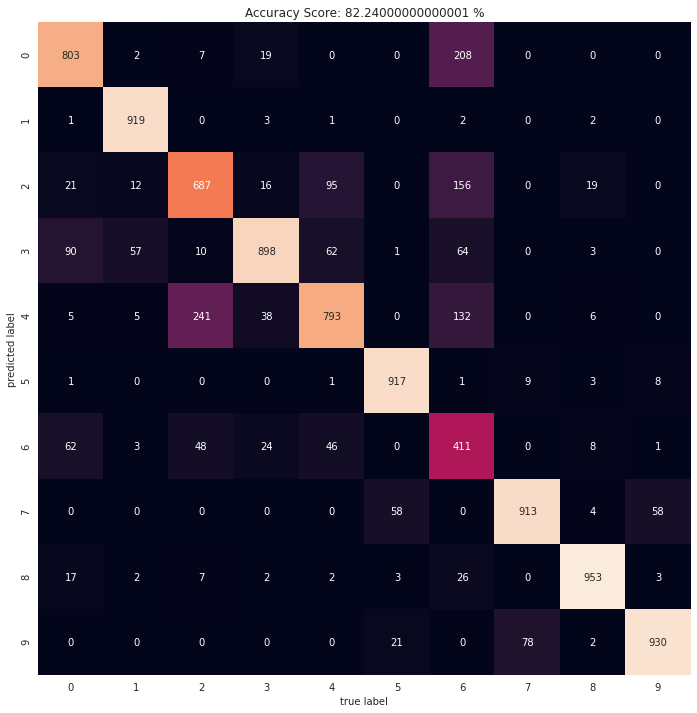

In [ ]:
# Let plot them to see what happen :
plt.figure(figsize=(12,12))
mat = confusion_matrix(y_test_flat, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(f'Accuracy Score: {accuracy_score(y_test_flat, y_test_predict)*100} %')
;

# so we all see the most wrong things come from label 2 and 6

In [ ]:
# # GridSearchCV

# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     # try (1x3)=3 combinations of hyperparameters
#     {'n_estimators': [100, 200], 'max_depth': [40, 50, 60]},
    
# ]

# rnd_clf_grid_search = RandomForestClassifier(random_state=42)
# # train across 3 folds, that's a total of 3x3=9 rounds of training 
# grid_search = GridSearchCV(rnd_clf_grid_search, param_grid, cv=3,
#                            scoring='neg_mean_squared_error')
# grid_search.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
# The best hyperparameter combinations
grid_search.best_params_


{'max_depth': 40, 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_
pd.DataFrame(grid_search.cv_results_).to_csv('grid_search.csv')
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.097308,0.007903,0.024342,0.000752,40,100,"{'max_depth': 40, 'n_estimators': 100}",-2.370315,-2.913043,-2.249249,-2.510869,0.288643,4
1,2.182492,0.015553,0.044872,0.002156,40,200,"{'max_depth': 40, 'n_estimators': 200}",-2.280360,-2.892054,-2.159159,-2.443858,0.320762,1
2,1.106067,0.009523,0.023624,0.000558,50,100,"{'max_depth': 50, 'n_estimators': 100}",-2.370315,-2.913043,-2.249249,-2.510869,0.288643,4
3,2.228902,0.062902,0.045969,0.001709,50,200,"{'max_depth': 50, 'n_estimators': 200}",-2.280360,-2.892054,-2.159159,-2.443858,0.320762,1
4,1.126434,0.004683,0.024164,0.000437,60,100,"{'max_depth': 60, 'n_estimators': 100}",-2.370315,-2.913043,-2.249249,-2.510869,0.288643,4
5,2.225027,0.036045,0.044815,0.000968,60,200,"{'max_depth': 60, 'n_estimators': 200}",-2.280360,-2.892054,-2.159159,-2.443858,0.320762,1


### Using Randomized Search CV to pickup a best param for Random Forest Model

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=64, high=200),
#         'max_features': randint(low=3, high=12),
#         'max_depth': randint(low=8, high=40),
#     }

# forest_reg = RandomForestRegressor(random_state=42)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# rnd_search.fit(X_train_flat, y_train_flat)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rnd_search.best_params_

{'max_depth': 18, 'max_features': 10, 'n_estimators': 180}

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Analyze the best models and their errors

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

### 4. XgBoost:
Not recommend because it take more time to train but the result isnt better than RF.

In [ ]:
start = time.time()
model = 'xgboost'
xgb_clf = XGBClassifier(n_estimators=20, n_jobs=-1, seed=0,max_depth=5)
xgb_clf.fit(X_train_reduced,y_train_flat)
stop = time.time()

# save the model to disk
filename = 'xgboost.sav'
pickle.dump(xgb_clf, open('xgb_clf_pca527', 'wb'))
print(f"Training time: {stop - start}s")

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_reduced, label=y_train_flat)
param = {
    'max_depth': 5,                 # the maximum depth of each tree
    'eta': 0.3,                     # the training step for each iteration
    'verbosity': 1,                 # logging mode - warn
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10                 # the number of classes that exist in this datset
}  
num_round = 50 # the number of training iterations

import time
start = time. time()
bstmodel = xgb.train(param, dtrain, num_round, evals=[(dtrain, 'label')], verbose_eval=10)
end = time.time()
exec_time = end - start
print('Execution time, secs: %d' % exec_time)

dtest = xgb.DMatrix(X_validation_reduced, label=y_test_predict)

preds = bstmodel.predict(dtest)

#testing-> apply -> turn back scale => pca


In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test_predict, preds)
print('Accuracy: %f' % acc)

Accuracy: 0.105700


In [ ]:
# #without PCA:
# y_test_predict = xgb_clf.predict(X_test_flat)
# y_train_predict = xgb_clf.predict(X_train_flat)

#with PCA processing:
y_test_predict  = xgb_clf.predict(X_validation_reduced)
y_train_predict = xgb_clf.predict(X_train_reduced)
#check the trainset
print(f'Accuracy by {model} on {n_samples} samples train dataset is {(accuracy_score(y_train_flat, y_train_predict))*100} %')
print(f'f1-score by {model} on {n_samples} samples train dataset is {f1_score(y_train_flat, y_train_predict,average="weighted")*100} %')
print(f'Recall by {model} on {n_samples} samples train dataset is {(recall_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
print(f'Precision by {model} on {n_samples} samples train dataset is {(precision_score(y_train_flat, y_train_predict,average="weighted")*100)} %')
#check the testset
print('....')
print(f'Accuracy by {model} on {n_test_samples} samples test dataset is {(accuracy_score(y_test_flat, y_test_predict))*100} %')
print(f'f1-score by {model} on {n_test_samples} samples test dataset is {(f1_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Recall by {model} on {n_test_samples} samples test dataset is {(recall_score(y_test_flat, y_test_predict,average="weighted"))*100} %')
print(f'Precision by {model} on {n_test_samples} samples train dataset is {(precision_score(y_test_flat, y_test_predict,average="weighted")*100)} %')

Accuracy by xgboost on 60000 samples train dataset is 84.53333333333333 %
f1-score by xgboost on 60000 samples train dataset is 84.21912309064243 %
Recall by xgboost on 60000 samples train dataset is 84.53333333333333 %
Precision by xgboost on 60000 samples train dataset is 84.3304999812373 %
....
Accuracy by xgboost on 10000 samples test dataset is 81.46 %
f1-score by xgboost on 10000 samples test dataset is 81.15202330519891 %
Recall by xgboost on 10000 samples test dataset is 81.46 %
Precision by xgboost on 10000 samples train dataset is 81.18713941737605 %


with Xgboost we got 87.3% accuracy on 6000 train and 1000 test sample dataset.
The next step is modified this model.

Text(0.5, 1.0, 'Accuracy Score: 53.92 %')

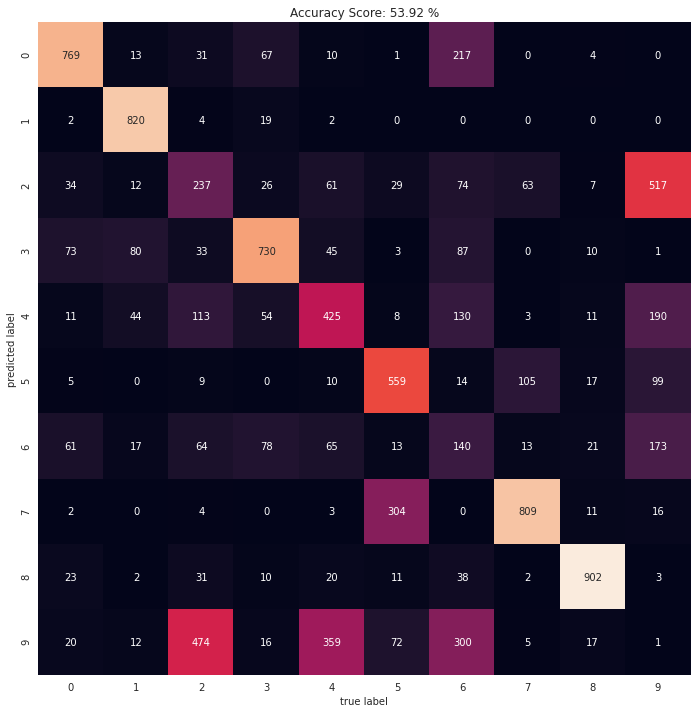

In [ ]:
# Let plot them to see what happen :
plt.figure(figsize=(12,12))
mat = confusion_matrix(y_test_flat, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(f'Accuracy Score: {accuracy_score(y_test_flat, y_test_predict)*100} %')

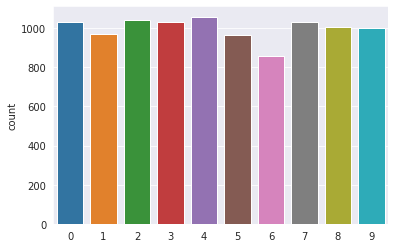

In [ ]:

sns.countplot(y_test_predict)

#### 5. LightGBM

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': 10,
    'num_boost_round': 300,
    'early_stopping_round': 5
}

gbm = lgb.train(params, lgb_train, valid_sets=lgb_eval)

y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
y_prex_max = np.argmax(y_pred, axis=1)

print(accuracy_score(y_prex_max, y_test))


[1]	valid_0's multi_logloss: 1.97689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.75916
[3]	valid_0's multi_logloss: 1.59171
[4]	valid_0's multi_logloss: 1.45645
[5]	valid_0's multi_logloss: 1.34321
[6]	valid_0's multi_logloss: 1.24801
[7]	valid_0's multi_logloss: 1.16468
[8]	valid_0's multi_logloss: 1.0912
[9]	valid_0's multi_logloss: 1.0267
[10]	valid_0's multi_logloss: 0.969051
[11]	valid_0's multi_logloss: 0.917369
[12]	valid_0's multi_logloss: 0.871204
[13]	valid_0's multi_logloss: 0.829615
[14]	valid_0's multi_logloss: 0.791144
[15]	valid_0's multi_logloss: 0.756217
[16]	valid_0's multi_logloss: 0.724602
[17]	valid_0's multi_logloss: 0.695273
[18]	valid_0's multi_logloss: 0.668705
[19]	valid_0's multi_logloss: 0.644529
[20]	valid_0's multi_logloss: 0.622418
[21]	valid_0's multi_logloss: 0.601871
[22]	valid_0's multi_logloss: 0.582674
[23]	valid_0's multi_logloss: 0.565151
[24]	valid_0's multi_logloss: 0.549044
[25]	valid_0's multi_lo

In [ ]:
# save the model to disk
filename = 'lightgbm.sav'
pickle.dump(gbm, open('lightgbm', 'wb'))

### PCA for dimensionality reduction :
Two purpose of this step is : 
1. Which some situations, we can go too far and actually use too much data or add too many features. Reduce noice( features ) maybe made some good result.
2. Less time taken for grid search and prediction is reduced. Also, we will calculate the scores based on the reduced features

#### Grid search for picking combination :
Grid search takes a lot of time on large datasets. Let us apply Dimensionality Reduction to the training dataset to reduce the number of features in the dataset, so that the time taken for grid search and prediction is reduced. Also, we will calculate the scores based on the reduced features.

Let us see, if dimensionality reduction leads to any significant loss of information from the images in our training dataset.

We will be using Projection technique for dimensionality reduction for faster GripSearch to choosing perfect combination model

In [ ]:

# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 459 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train_flat)
pca.n_components_

459

In [ ]:
# Checking if hit your 99% minimum?
np.sum(pca.explained_variance_ratio_)
print(f'Reduced features from {X_train_flat.shape[0]},{X_train_flat.shape[1]} to {X_train_reduced.shape[0]},{X_train_reduced.shape[1]}')

Reduced features from 60000,784 to 60000,459


In [ ]:
# use inverse_transform to decompress back to 784 dimensions

X_train_recovered = pca.inverse_transform(X_train_reduced)

The X_train_reduced dataset that we got after applying dimensionality reduction is called compressed dataset (X_train_reduced).
Now, to check, if there was any significant information (data) loss for each image of X_train_reduced (that we got after dimensionality reduction), due to compression, as compared to original dataset X_train_flat, let us recover one of the images from X_train_reduced dataset by decompressing (applying inverse) it and compare this recovered image (decompressed image) with its corresponding original image (from X_train_flat).

Let us recover (decompress) one of the images (instance) of X_train_reduced

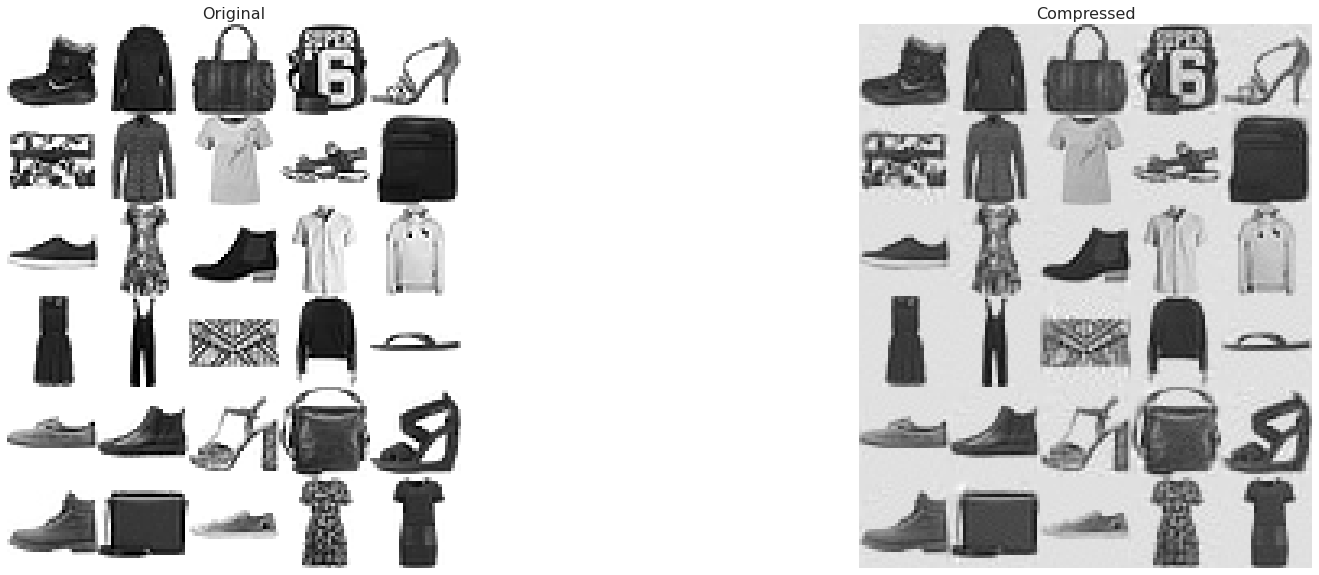

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(28, 10))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train_flat[::2000])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2000])
plt.title("Compressed", fontsize=16)
plt.show()

Fine-tuning the selected **RandomForest classifier model**


By applying dimensionality reduction (with variance ratio of 0.99 i.e. n_components=0.99), we don't get any significant loss of information(quality) in the resulting X_train_reduced dataset. Hence, we will use the X_train_reduced (dimensionally reduced dataset) for grid search

In [ ]:
# # GridSearchCV

# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     # try (1x3)=3 combinations of hyperparameters
#     {'n_estimators': [200, 250], 'max_depth': [30,40,50]},
    
# ]

# rdn_clf_grid_search = RandomForestClassifier(random_state=42)
# # train across 3 folds, that's a total of 3x3=9 rounds of training 
# grid_search = GridSearchCV(rnd_clf_grid_search, param_grid, cv=3,
#                            scoring='neg_mean_squared_error')
# grid_search.fit(X_train_reduced, y_train_flat)

In [ ]:
# The best hyperparameter combinations
grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 20}

In [ ]:
# The best hyperparameter combinations
grid_search.best_params_
grid_search.best_estimator_
pd.DataFrame(grid_search.cv_results_).to_csv('grid_search.csv')
pd.DataFrame(grid_search.cv_results_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pd.DataFrame(grid_search.cv_results_).to_csv('grid_search.csv')
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,74.267883,0.974781,0.107318,0.002934,0.5,10,20,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est...",-2.378224,-2.212721,-2.39994,-2.330295,0.083609,1


We have the best params on max_depth = 10 and n_estimators = 20, learning_rate = 0.5


In [ ]:
# Let's look at the score of each hyperparameter combination used during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.526530447480559 {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 20}


In [ ]:

#Run this after changed n_samples

final_model = grid_search.best_estimator_

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Remember, you have to use pca object of training dataset (you got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (not fit_transform) - highly important

X_test_reduced = pca.transform(X_test_flat)

y_test_predict = final_model.predict(X_test_reduced)

confusion_matrix(y_test_flat, y_test_predict)
final_accuracy = accuracy_score(y_test_flat, y_test_predict)
final_precision = precision_score(y_test_flat, y_test_predict, average='weighted')
final_recall = recall_score(y_test_flat, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test_flat, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_precision)
print("Final F1 Score: ", final_f1_score)

We got best model from gridsearch

# TEST SET:

So much noise in the test set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/My Drive/FTMLE | 2020.09 | Kermadec/Week 6/Weekly Project/'

In [ ]:
X_test_augmented = np.load(PATH + 'FMNIST_augmented_test.npy')

In [ ]:
X_test_augmented.shape

(40000, 28, 28)

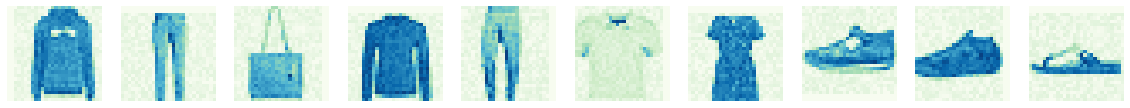

In [ ]:
images = get_samples(10, X_test_augmented)
plot_images(images)

In [ ]:
X_test_augmented_flat = X_test_augmented.reshape((40000,-1))/255
X_test_augmented_flat.shape

(40000, 784)

#### PCA

In [ ]:
# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

#scale first
X_test_augmented_flat =scaler.fit_transform(X_test_augmented_flat)


# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# using the same n_components  with train & validation data.

#apply training PCA to this transform

X_test_reduced = pca.transform(X_test_augmented_flat)
pca.n_components_

527

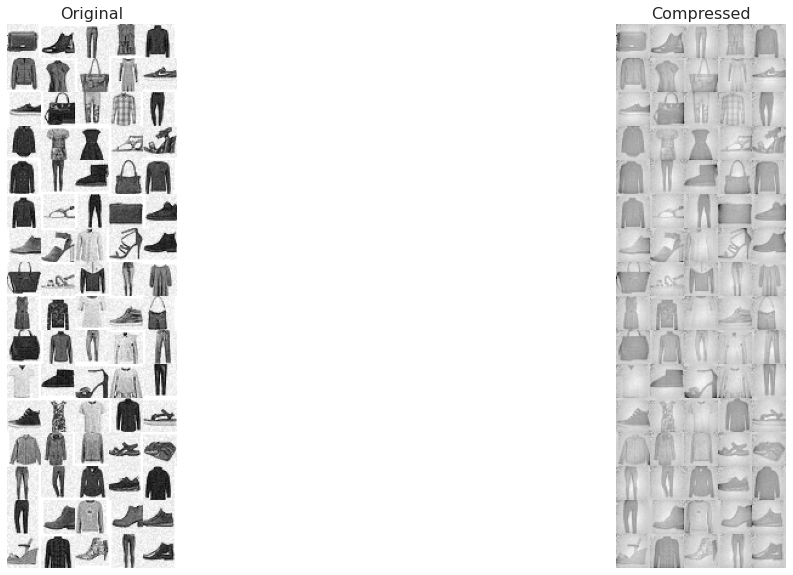

In [ ]:

# use inverse_transform to decompress back to 784 dimensions

X_test_recovered = pca.inverse_transform(X_test_reduced)

plt.figure(figsize=(20, 10))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_test_augmented[::500])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_test_recovered[::500])
plt.title("Compressed", fontsize=16)
plt.show()

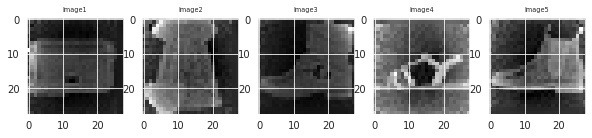

In [ ]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_test_augmented_flat[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
X_test_augmented_binary = binarizer.fit_transform(X_test_augmented_flat)
X_test_augmented_binary.shape

(40000, 784)

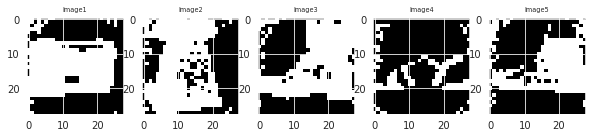

In [ ]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_test_augmented_binary[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

#### Application

In [ ]:
# let's make a silly prediction that every image is T-shirt, meaning every prediction is 0
# Here is how you can make such prediction
predictions = np.array([0 for i in range(len(X_test_augmented))])

In [ ]:
predictions.shape # make sure that you have 40000 predictions, since the hidden test set has 40000 images

(40000,)

#### Model SVC + PCA

In [ ]:
model = 'SVC'

start = time.time()

predictions =  svm.predict(X_test_reduced)

#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(svm, open('svm_PCA', 'wb'))

print(f"Predict time: {stop - start}s")

Predict time: 596.9452228546143s


#### Model Random Forest

In [ ]:
model = 'rdn'

start = time.time()

predictions =  rnd_clf.predict(X_test_augmented_flat)

#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()

# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(svm, open('svm', 'wb'))

print(f"Predict time: {stop - start}s")

Predict time: 0.8882224559783936s


#### Model Logistic Regression

In [ ]:
# logReg
import pickle

model = 'LogR'

start = time.time()

predictions =  logReg.predict(X_test_reduced)


#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logReg, open('LogRegPCA', 'wb'))

print(f"Predict time: {stop - start}s")

Predict time: 0.07501411437988281s


#### Model Xgboost

In [ ]:
#xgboost

model = 'xgboost'

start = time.time()

# predictions =  xgb_clf.predict(X_test_reduced)
predictions =  xgb_clf.predict(X_test_augmented_flat)
#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()

# save the model to disk
filename = 'xgboost.sav'
pickle.dump(xgb_clf, open('xgb_clf', 'wb'))

print(f"Predict time: {stop - start}s")

Predict time: 1.7014744281768799s


#### Light GBM 

In [ ]:
#lightGBM

model = 'lightGBM'

start = time.time()


y_predict = gbm.predict(X_test_augmented_flat, num_iteration=gbm.best_iteration)
predictions = np.argmax(y_predict, axis=1)

# predictions =  xgb_clf.predict(X_test_reduced)
# predictions =  gbm.predict(X_test_augmented_flat)
#best : (n_estimators=200, max_depth=40, n_jobs= -1, random_state=42)

stop = time.time()


print(f"Predict time: {stop - start}s")

Predict time: 3.678372383117676s


### Testing and export

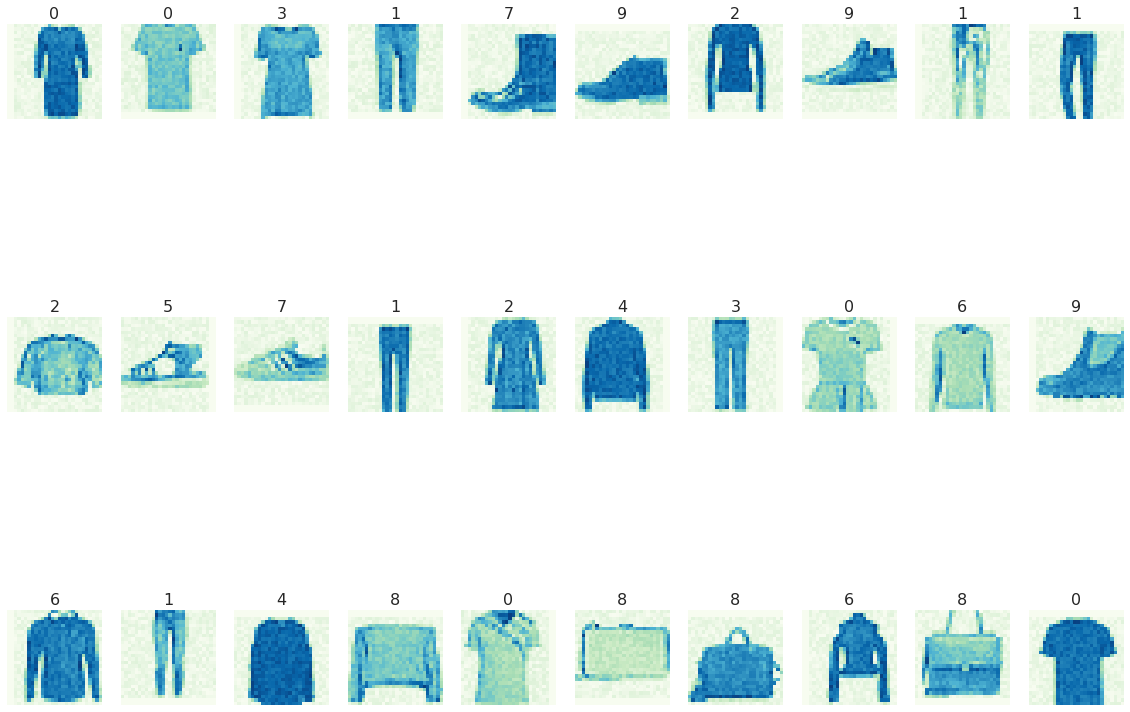

In [ ]:
images, labels = get_samples(30, X_test_augmented, predictions)
plot_images(images, labels)

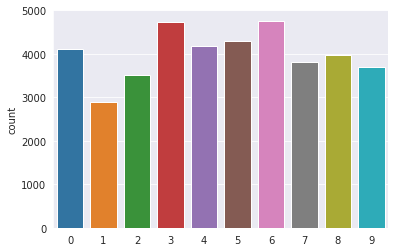

In [ ]:
sns.countplot(predictions);

In [ ]:
predictions.shape

(40000,)

In [ ]:
pred_df = pd.DataFrame(predictions,columns=['pred'])
pred_df.head()

,pred
0,8
1,6
2,9
3,5
4,9


In [ ]:
pred_df.to_csv("SVM_PCA_submission.csv", index=None)
pred_df.shape

(40000, 1)

Add this point, when you click on File (on the left panel) you should have a file named ```<yourname>_submission.csv```. You can download this file (click on the 3 dots and hit Download), then upload it to the Submission folder I linked above.



Good luck!